<a href="https://colab.research.google.com/github/Rasheena-Arimbrathodi/Datasets/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("noisy_mnist.csv",header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.264608,0.060024,0.146811,0.336136,0.280311,-0.139760,0.233830,0.371765,0.669086,0.530387,...,0.911594,1.065910,0.813509,0.559103,0.576087,0.143439,0.082710,-0.040196,0.104130,0.104220
1,-0.108767,-0.202736,-0.170056,0.332693,0.186255,0.280204,0.253478,0.363563,0.039638,0.300219,...,0.564037,0.439045,0.601399,0.758090,0.615006,0.495628,0.418448,0.651263,0.450334,0.362928
2,-0.199832,-0.295294,-0.099008,0.026376,0.074813,0.157204,0.042648,0.261847,-0.017913,0.042030,...,0.006110,-0.227748,0.048597,0.511590,0.850562,0.497355,0.232944,-0.157354,-0.015151,0.002892
3,0.277441,-0.031975,-0.070889,0.047647,0.075778,0.556461,0.741170,0.604523,0.770517,0.562931,...,0.290294,0.645014,0.688283,-0.053283,0.047673,0.014939,0.152352,0.105156,-0.062622,-0.164624
4,0.256846,-0.118795,-0.155106,-0.134832,0.297439,0.241704,0.469472,0.815539,0.763322,0.545774,...,0.475727,1.085077,1.194813,0.838231,0.959414,0.852181,0.439244,0.093923,-0.093429,0.102673


In [ ]:
df.shape

(325, 256)

In [ ]:
#function to plot the images
def plot_mnist_images(X):
   '''X:MNIST image'''
   fig,ax=plt.subplots(10,10,figsize=(5,5))
   ax=ax.flatten()
   for img, a in zip(X,ax):
     a.imshow(img.reshape(16,16),cmap="Greys")
     a.axis("off")


In [ ]:
#DataFrame to numpy array#
X=np.array(df)
#plot_mnist_images(X)
X.shape

(325, 256)

In [ ]:
#train_test_split
X_train,X_test=train_test_split(X,train_size=0.8)

In [ ]:
#svd
U,S,Vt=np.linalg.svd(X_train)

In [ ]:
#Function to get principal components
def get_principal_comps(X,Vt,n):
  '''
  X:data matrix
  Vt: right singular matrix
  '''
  PC=X@(Vt.T)
  return PC[:,:n]

In [ ]:
#Function to reconstruct the images
def Reconstructed_data_matrix(PC,Vt,n):
  """"
  PC:principaa component
  Vt: Right singular matrix
  """
  X_=PC@(Vt[:n,:])
  return X_

In [ ]:
#reconstructing the images
n=256
PC_image=get_principal_comps(X_train,Vt,n)
recons_image1=Reconstructed_data_matrix(PC_image,Vt,n)

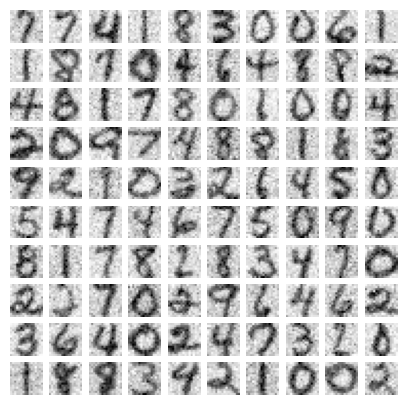

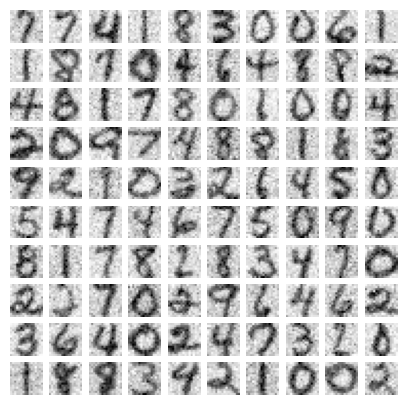

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image1)

## Observations

---
1. There is a noticeable similarity between the images from the trained dataset and the reconstructed images using the top 256 principal components.
2. This similarity gives information about the important features of the original images.
3. I may say the dimensionality reduction technique is successful in this case



In [ ]:
#reconstructing the images
n=150
PC_image=get_principal_comps(X_train,Vt,n)
recons_image_2=Reconstructed_data_matrix(PC_image,Vt,n)

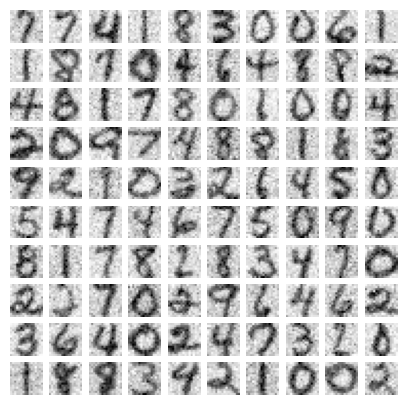

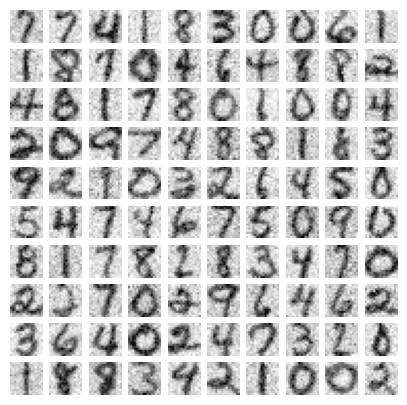

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image_2)

In [ ]:
#reconstructing the images
n=128
PC_image=get_principal_comps(X_train,Vt,n)
recons_image2=Reconstructed_data_matrix(PC_image,Vt,n)

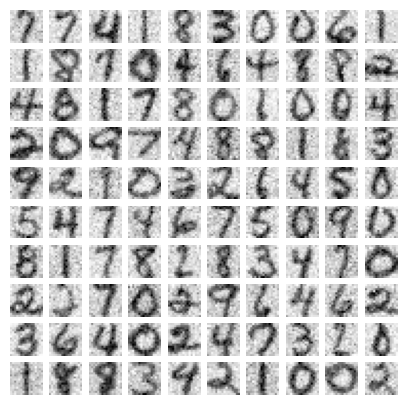

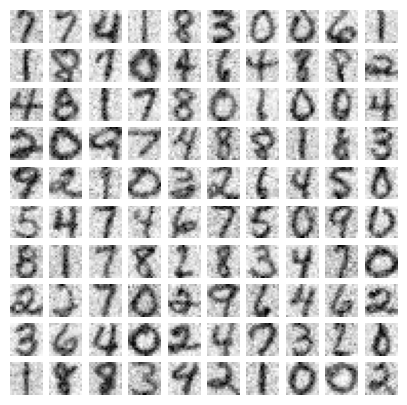

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image2)

## Observations

---

1. When the top 128 principal components are used to recreate the original image, it gives fair information about the original image.
2. I may say the dimensionality reduction technique is successful in this case also.
3. But the clarity of the image with top 128 principal components and top 256 principal components is different. The reconstructed image with 256 principal components have better clarity than a reconstructed image with top 128 principal components.

In [ ]:
#reconstructing the images
n=64
PC_image=get_principal_comps(X_train,Vt,n)
recons_image3=Reconstructed_data_matrix(PC_image,Vt,n)

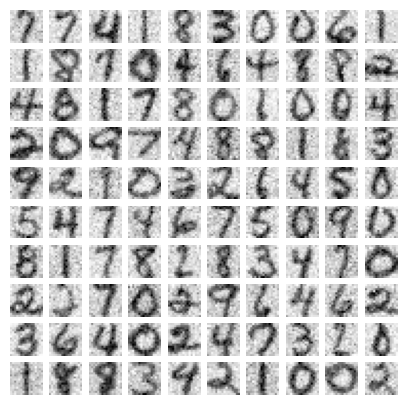

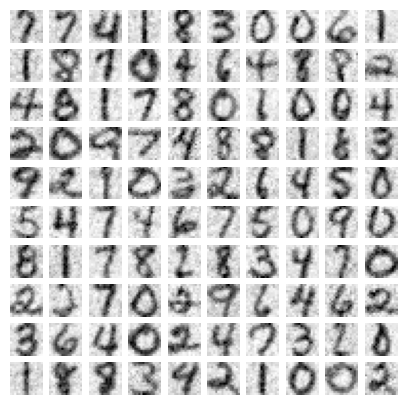

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image3)

## Observations

---

1. Using the top 64 principal components for reconstructing the original image yielded an outcome that provides a moderate representation of the original content. However, there is a slight uncertainty in interpreting 1-2 specific numbers within the reconstructed image.
2. I may say the dimensionality reduction technique is not completely successful in this case.
3. The level of image clarity varies among the reconstructed images using the top 64, top 128, and top 256 principal components. Notably, the image reconstructed with the top 256 principal components exhibits superior clarity compared to those reconstructed with the top 128 and top 64 principal components.

In [ ]:
#reconstructing the images
n=32
PC_image=get_principal_comps(X_train,Vt,n)
recons_image4=Reconstructed_data_matrix(PC_image,Vt,n)

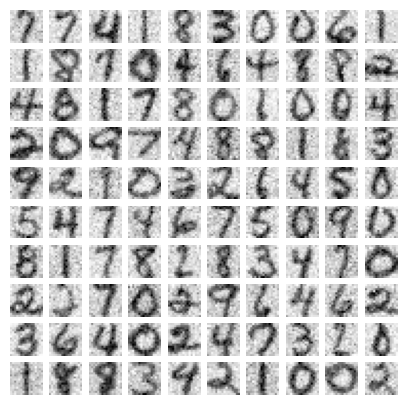

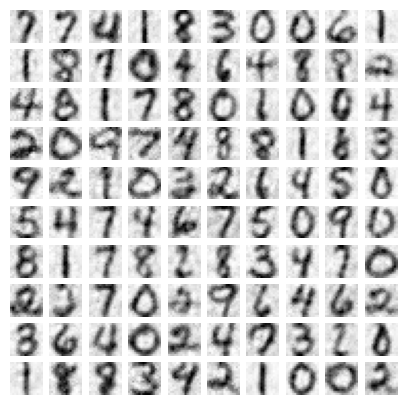

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image4)

## Observations

---


1. Reconstructing the original image using the top 32 principal components resulted in an outcome that moderately represents the original content. However, there exists a slight uncertainty in interpreting 2-3 specific numbers within the reconstructed image. This suggests that the dimensionality reduction technique might not have achieved complete success in this instance.

2. The level of image clarity varies across the reconstructed images employing different numbers of principal components, including the top 32, top 64, top 128, and top 256. Importantly, the image reconstructed using the top 256 principal components demonstrates significantly enhanced clarity compared to those reconstructed using the top 128, top 64 principal components, and even the top 32 principal components.

In [ ]:
#reconstructing the images
n=80
PC_image=get_principal_comps(X_train,Vt,n)
recons_image5=Reconstructed_data_matrix(PC_image,Vt,n)

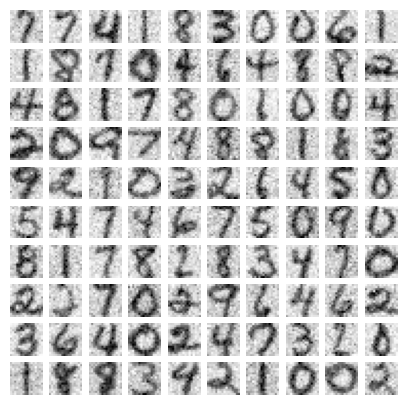

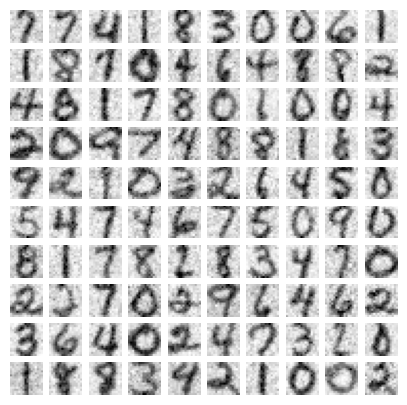

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image5)

In [ ]:
#reconstructing the images
n=90
PC_image=get_principal_comps(X_train,Vt,n)
recons_image6=Reconstructed_data_matrix(PC_image,Vt,n)

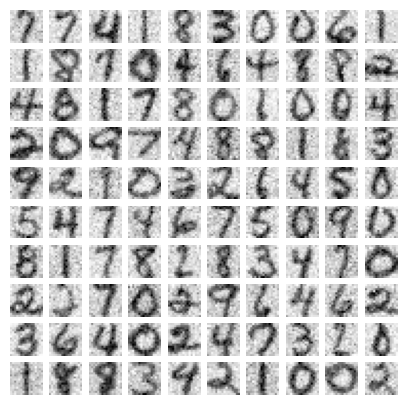

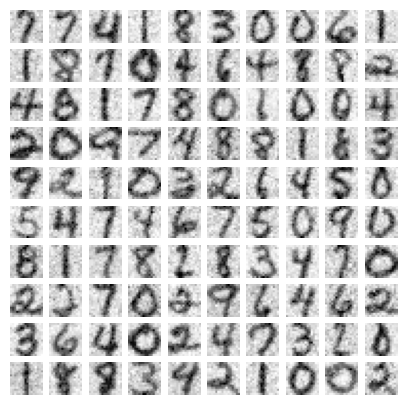

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image6)

In [ ]:
#reconstructing the images
n=100
PC_image=get_principal_comps(X_train,Vt,n)
recons_image7=Reconstructed_data_matrix(PC_image,Vt,n)

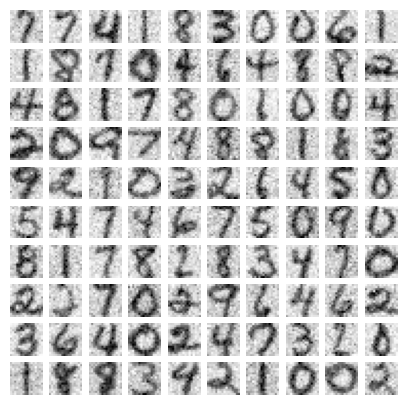

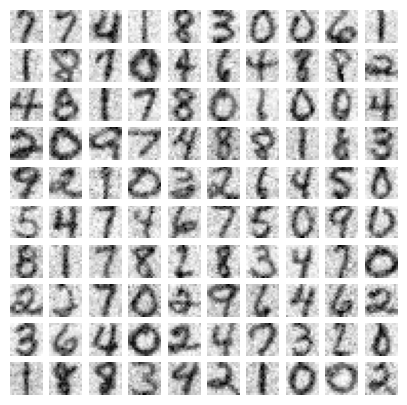

In [ ]:
#plotting actual image and reconstructed image
plot_mnist_images(X_train)
plot_mnist_images(recons_image7)

## FINAL OBSERVATIONS

---


1. Using a small number of principal components (e.g., 32 to 64) might result in recognizable images, but they could be a bit blurry or lack fine details.
Using a larger number of principal components (e.g., 128 to 256) will likely result in clearer images with more details.

2. Observing the reconstructed images, I would say the top 80 Principal Components are enough to represent the data given.

3. After careful consideration, I found that a range between 80 and 150 principal components offered a balanced trade-off between retaining essential information and achieving computational efficiency. This selection resulted in de-noised images that maintained clarity and recognizable features while avoiding excessive computational complexity.